CountVectorizer - Dimensionality: (3000, 9638)


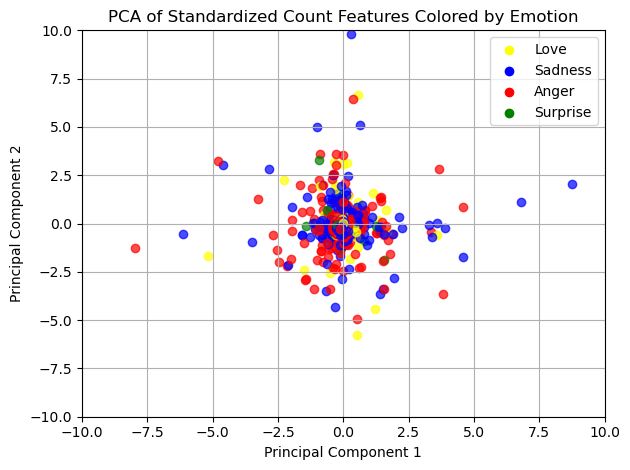

  (0, 1584)	0.39320015314450113
  (0, 7872)	0.21614714381802608
  (0, 591)	0.2342126441065749
  (0, 5485)	0.45506336716299056
  (0, 480)	0.15615600892725925
  (0, 9580)	0.17535151088507356
  (0, 4065)	0.2815175461880626
  (0, 8516)	0.18576348003795862
  (0, 7548)	0.3047854129660645
  (0, 1677)	0.5243554350010255
  (1, 9588)	0.34315923879474614
  (1, 9481)	0.34315923879474614
  (1, 8987)	0.34315923879474614
  (1, 983)	0.2767263376334309
  (1, 4398)	0.10912309733022436
  (1, 8608)	0.1438605353108004
  (1, 8672)	0.19247071813549504
  (1, 5875)	0.23277818492150995
  (1, 4150)	0.34315923879474614
  (1, 9412)	0.1453739176109938
  (1, 3586)	0.19946380513624787
  (1, 2273)	0.2914488386471938
  (1, 9480)	0.34315923879474614
  (1, 7935)	0.25482355164592974
  (2, 9103)	0.255406362934962
  :	:
  (2998, 480)	0.15977619267684623
  (2999, 2108)	0.2835414216110414
  (2999, 8976)	0.2835414216110414
  (2999, 9003)	0.26971265983227
  (2999, 3145)	0.26971265983227
  (2999, 5817)	0.24081478420093044
  (299

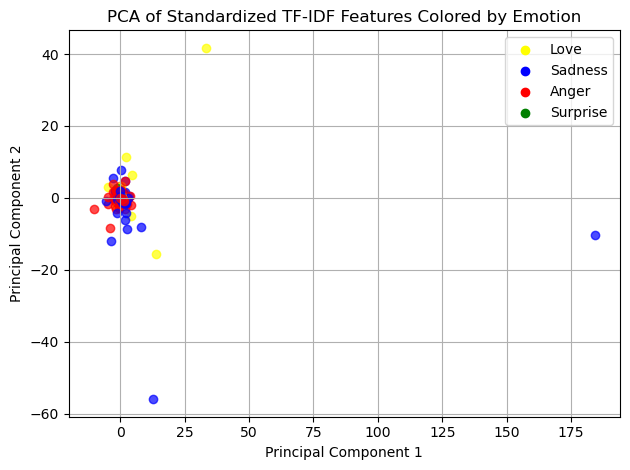

In [17]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import jsonlines
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

json_file_path = 'train.json'  

data = []
with jsonlines.open(json_file_path) as reader:
    for obj in reader:
        data.append(obj) 

df = pd.DataFrame(data)


text_data = [entry['Tweet'] for entry in data]
class_love = [entry['love'] for entry in data] 
class_anger = [entry['anger'] for entry in data]
class_sadness = [entry['sadness'] for entry in data]
class_surprise = [entry['surprise'] for entry in data]

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(text_data)
count_shape = count_matrix.shape
print(f"CountVectorizer - Dimensionality: {count_shape}")


scaler_count = StandardScaler(with_mean=False) 
count_scaled = scaler_count.fit_transform(count_matrix)
pca = PCA(n_components=2)
count_matrix = count_scaled.toarray()
count_pca = pca.fit_transform(count_matrix)

#print(count_pca)
for i in range(count_pca.shape[0]):
    if class_love[i]:
        color = 'yellow'
    elif class_sadness[i]:
        color = 'blue'
    elif class_anger[i]:
        color = 'red'
    elif class_surprise[i]:
        color = 'green'
    else:
        continue 
    
    plt.scatter(count_pca[i, 0], count_pca[i, 1], color=color, alpha=0.7)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.title('PCA of Standardized Count Features Colored by Emotion')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend
plt.scatter([], [], color='yellow', label='Love')
plt.scatter([], [], color='blue', label='Sadness')
plt.scatter([], [], color='red', label='Anger')
plt.scatter([], [], color='green', label='Surprise')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()



tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix)
# Apply PCA
scaler = StandardScaler(with_mean=False) 
tfidf_scaled = scaler.fit_transform(tfidf_matrix)
pca = PCA(n_components=2)
tfidf_matrix = tfidf_scaled.toarray()
tfidf_pca = pca.fit_transform(tfidf_matrix)
tfidf_shape = tfidf_matrix.shape
print(f"TfidfVectorizer - Dimensionality: {tfidf_shape}")

# print(tfidf_pca)
# print(len(tfidf_pca))
for i in range(tfidf_pca.shape[0]):
    if class_love[i]:
        color = 'yellow'
    elif class_sadness[i]:
        color = 'blue'
    elif class_anger[i]:
        color = 'red'
    elif class_surprise[i]:
        color = 'green'
    else:
        continue  # Skip if none of the classes match
    
    plt.scatter(tfidf_pca[i, 0], tfidf_pca[i, 1], color=color, alpha=0.7)

# Set axis limits to [-25, 25]
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)

# Plot aesthetics
plt.title('PCA of Standardized TF-IDF Features Colored by Emotion')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend
plt.scatter([], [], color='yellow', label='Love')
plt.scatter([], [], color='blue', label='Sadness')
plt.scatter([], [], color='red', label='Anger')
plt.scatter([], [], color='green', label='Surprise')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()